#Assignment 2

The Newton-Raphson method for complex function is similarly has such recurrence function:

\begin{equation}
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)}
\end{equation}

For $f(z) = z^3 - 1$ it will be:

\begin{equation}
z_{n+1} = z_n - \frac{z_n^3-1}{3z_n^2}
\end{equation}

And analytical solution gives three answers: $(1, 0)$, $(-0.5, -\sqrt{3}/2)$, $(-0.5, \sqrt{3}/2)$.

We can easily implement this by slightly changing Newton's method code from the first assignment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath #for complex() function
from matplotlib.colors import ListedColormap #later for discrete colormap

In [ ]:
def f(z):
  return z**3 - 1

def df(z):
  return 3*z**2

In [ ]:
def solve_cnewton(f, df, x, y, error, M):
  iter = 0
  z1 = complex(x, y) #only change to our regular function
  z2 = z1
  if f(z1) != 0 and df(z1) != 0:
    while iter < M:
      z2 = z1
      derivative = df(z1)
      z1 = z1 - f(z1)/derivative
      if abs(z1 - z2) < error or abs(f(z2)) < error:
        return z2, iter
      iter += 1
  return None, iter

Example below gives us one answer for our chosen initial points in complex plane.

In [ ]:
ans, iter = solve_cnewton(f, df, 1, -1, 1e-12, 200)
print(ans, iter)

(0.9999999999999994+4.556244651765188e-16j) 8


Now we can expand this to get a fractal image. We can iterate $\tt solve\_cnewton()$ function over many points in complex plane and record the results for values and iterations into arrays.

In [ ]:
def fractal(X, Y, f, df, M, error):
  Real = np.empty((X.size, Y.size))
  Imag = np.empty((X.size, Y.size))
  Z = np.empty((X.size, Y.size), dtype=complex)
  Iter = np.empty((X.size, Y.size))
  for i in range(X.size):
    for j in range(Y.size):
      Root, iter = solve_cnewton(f, df, X[i], Y[j], error, M)
      if Root is not None:  # Check if a root was found
        Real[i, j] = Root.real
        Imag[i, j] = Root.imag
        Z[i, j] = Root
        Iter[i, j] = iter
      else:
        Real[i, j] = np.nan
        Imag[i, j] = np.nan
        Z[i, j] = np.nan + 1j * np.nan
        Iter[i, j] = np.nan  # or use M as a marker for max iterations reached
      # Real[i, j] = Root.real
      # Imag[i, j] = Root.imag
      # Z[i, j] = Root
      # Iter[i, j] = iter
  return Real, Imag, Z, np.log10(Iter) #we return real and imagianry part of inital guess, final value and iterations

In [ ]:
X = np.linspace(-200, 200, 400)
Y = np.linspace(-200, 200, 400)
X_mesh, Y_mesh = np.meshgrid(X, Y)

ans_x, ans_y, ans_z, ans_iter_log10 = fractal(X, Y, f, df, 200, 1e-9)
#uncomment to print out values
# for i in range(X.size):
#   for j in range(Y.size):
#     print(X_mesh[i,j], Y_mesh[i,j], ans_z[i,j], ans_iter[i,j])

Three solutions vary by zero, negative and positive imaginary part. We can plot the final result in terms of these three values.

Red: $(-0.5, -\sqrt{3}/2)$

Green: $(1, 0)$\

Blue: $(-0.5, \sqrt{3}/2)$

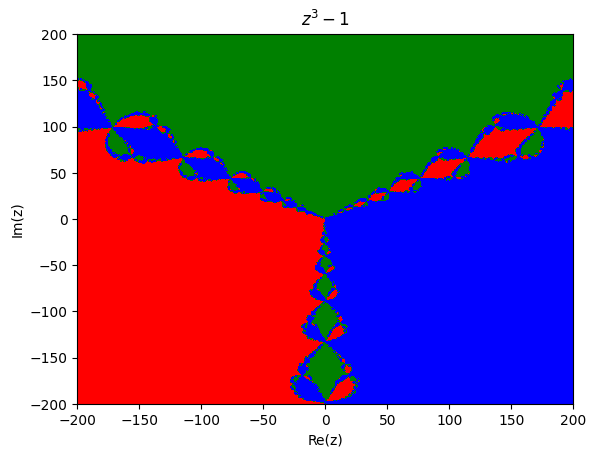

In [ ]:
plt.figure()
cmap = ListedColormap(['red', 'green', 'blue'])
plt.contourf(X_mesh, Y_mesh, ans_z.imag, cmap=cmap)
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^3-1$')
plt.show()

We get this image with three fractal limbs 120 degrees apart. Let's zoom in closer to center:

In [ ]:
X2 = np.linspace(-2, 2, 400)
Y2 = np.linspace(-2, 2, 400)
X_mesh2, Y_mesh2 = np.meshgrid(X2, Y2)

ans_x2, ans_y2, ans_z2, ans_iter2_log10 = fractal(X2, Y2, f, df, 200, 1e-9)

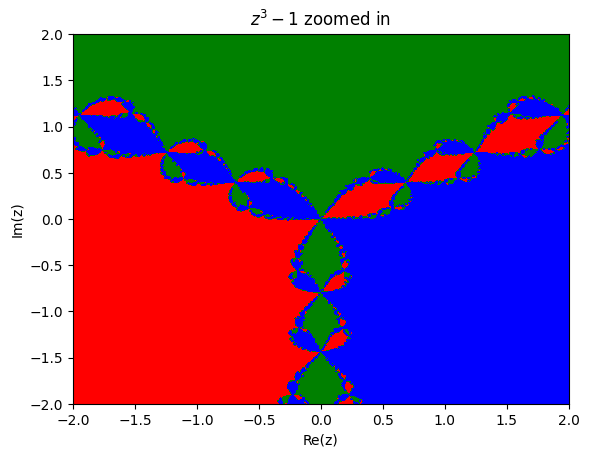

In [ ]:
plt.figure()
cmap = ListedColormap(['red', 'green', 'blue'])
plt.contourf(X_mesh2, Y_mesh2, ans_z2.imag, cmap=cmap)
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^3-1$ zoomed in')
plt.show()

Let's zoom in further.

In [ ]:
X3 = np.linspace(-0.5, 0.5, 400)
Y3 = np.linspace(-1, 0, 400)
X_mesh3, Y_mesh3 = np.meshgrid(X3, Y3)

ans_x2, ans_y3, ans_z3, ans_iter3_log10 = fractal(X3, Y3, f, df, 200, 1e-9)

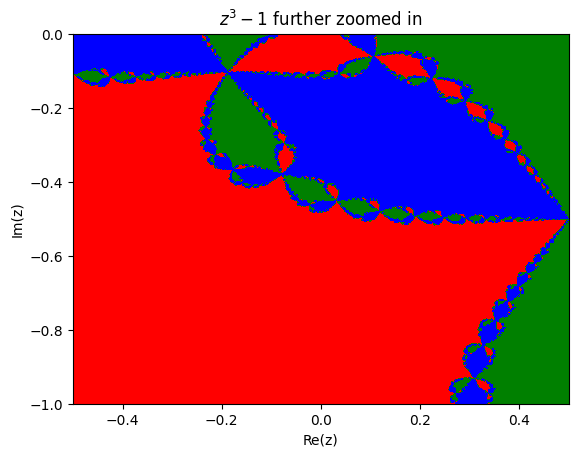

In [ ]:
plt.figure()
cmap = ListedColormap(['red', 'green', 'blue'])
plt.contourf(X_mesh3, Y_mesh3, ans_z3.imag, cmap=cmap)
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^3-1$ further zoomed in')
plt.show()

In [ ]:
X4 = np.linspace(-0.3, -0.15, 400)
Y4 = np.linspace(-0.5, 0.0, 400)
X_mesh4, Y_mesh4 = np.meshgrid(X4, Y4)

ans_x4, ans_y4, ans_z4, ans_iter4_log10 = fractal(X4, Y4, f, df, 200, 1e-9)

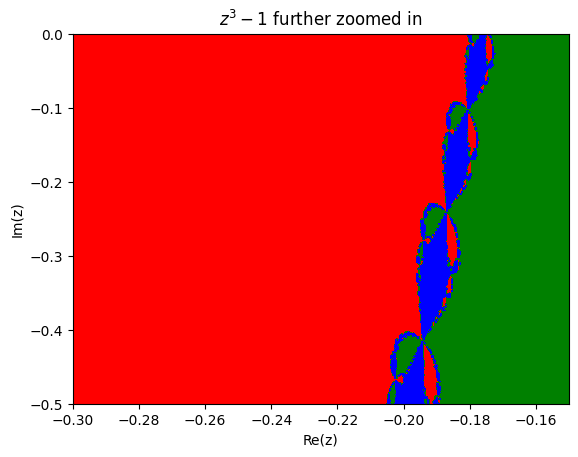

In [ ]:
plt.figure()
cmap = ListedColormap(['red', 'green', 'blue'])
plt.contourf(X_mesh4, Y_mesh4, ans_z4.imag, cmap=cmap)
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^3-1$ further zoomed in')
plt.show()

So we can see that each of these red-blue-green patterns contain similar pattern inside on borders i.e. a fractal.

Furthermore, we can contourplot decimal logarithm of number of iterations for convergence, and focus closer on the fractal pattern.

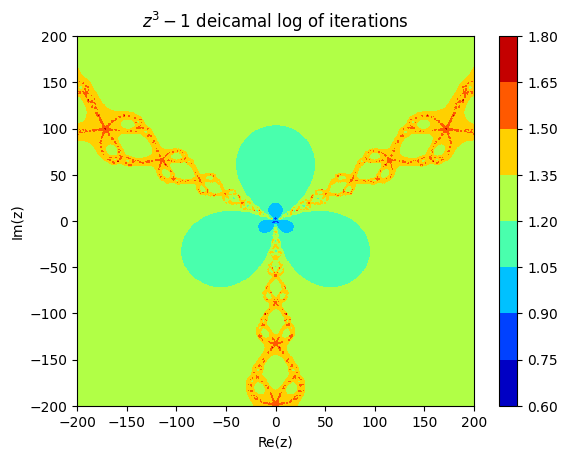

In [ ]:
plt.figure()
plt.contourf(X_mesh, Y_mesh, ans_iter_log10, cmap='jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^3-1$ deicamal log of iterations')
plt.show()

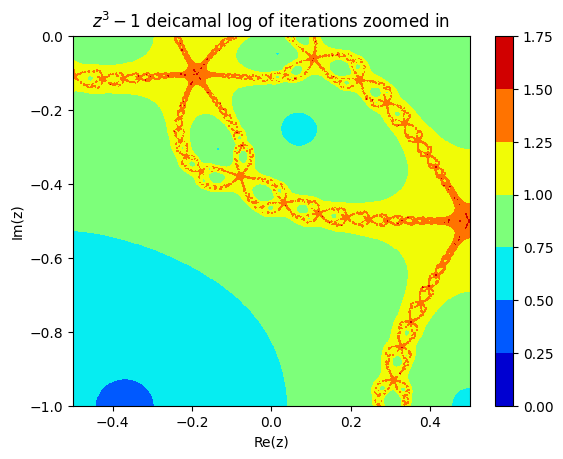

In [ ]:
#taking closer look
plt.figure()
plt.contourf(X_mesh3, Y_mesh3, ans_iter3_log10, cmap='jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^3-1$ deicamal log of iterations zoomed in')
plt.show()

We can see that "borders" of different values require more iterations in one order of magnitude or more to converge.

Further we can explore the sensitivity of the method on different error with function $z^4-1=0$.

In [ ]:
def f2(z):
  return z**4 - 1

def df2(z):
  return 4*z**3

In [ ]:
X_f2 = np.linspace(-0.5, 0.5, 400)
Y_f2 = np.linspace(-0.5, 0.5, 400)
X_f2_mesh, Y_f2_mesh = np.meshgrid(X_f2, Y_f2)

ans_x_f2, ans_y_f2, ans_z_f2, ans_iter_f2_log10 = fractal(X_f2, Y_f2, f2, df2, 200, 1e-9)

In [ ]:
#here we assign a number for each of four solutions to distinguish four colors
root_num = np.empty((400, 400))
for i in range(400):
  for j in range(400):
    if ans_z_f2[i,j].real > 0.25:
      root_num[i,j] = 0.5
    elif ans_z_f2[i,j].real < -0.25:
      root_num[i,j] = 1.5
    elif ans_z_f2[i,j].imag > 0.25:
      root_num[i,j] = 2.5
    elif ans_z_f2[i,j].imag < -0.25:
      root_num[i,j] = 3.5
    else:
      root_num[i,j] = 4.5 #for None

In the plot below:

Red: $z = 1$

Green: $z = -1$

Blue: $z = i$

Yellow: $z = -i$

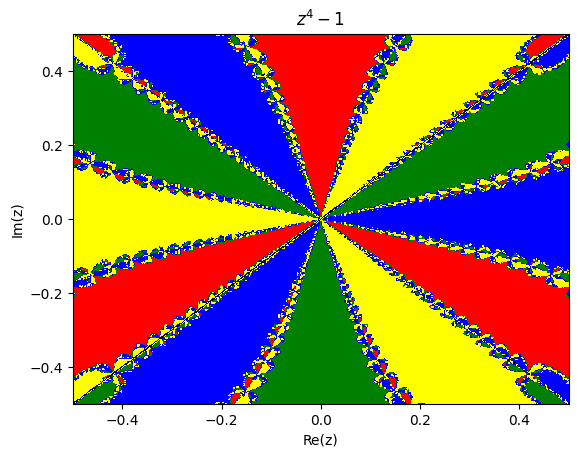

In [ ]:
plt.figure()
cmap2 = ListedColormap(['red', 'green', 'blue', 'yellow', 'black'])
plt.contourf(X_f2_mesh, Y_f2_mesh, root_num, levels=[0, 1, 2, 3, 4, 5], cmap=cmap2)
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^4-1$')
plt.show()

If we decrease error tolerance down to $10^{-14}$ and number of iterations down to 30.

In [ ]:
X2_f2 = np.linspace(-0.5, 0.5, 400)
Y2_f2 = np.linspace(-0.5, 0.5, 400)
X2_f2_mesh, Y2_f2_mesh = np.meshgrid(X_f2, Y_f2)

ans_x2_f2, ans_y2_f2, ans_z2_f2, ans_iter2_f2_log10 = fractal(X2_f2, Y2_f2, f2, df2, 30, 1e-14)

In [ ]:
root_num2 = np.empty((400, 400))
for i in range(400):
  for j in range(400):
    if ans_z2_f2[i,j].real > 0.25:
      root_num2[i,j] = 0.5
    elif ans_z2_f2[i,j].real < -0.25:
      root_num2[i,j] = 1.5
    elif ans_z2_f2[i,j].imag > 0.25:
      root_num2[i,j] = 2.5
    elif ans_z2_f2[i,j].imag < -0.25:
      root_num2[i,j] = 3.5
    else:
      root_num2[i,j] = 4.5 #for None

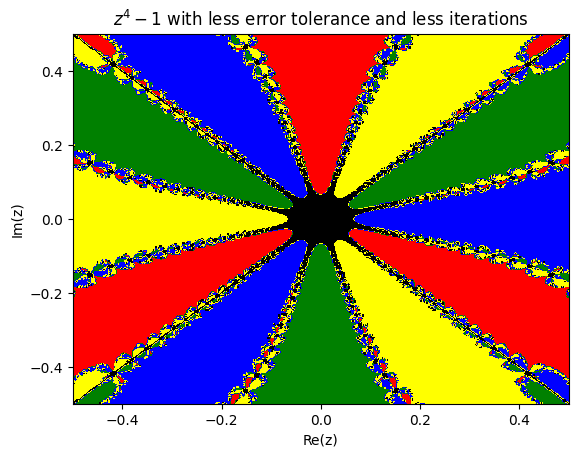

In [ ]:
plt.figure()
plt.contourf(X2_f2_mesh, Y2_f2_mesh, root_num2, levels=[0, 1, 2, 3, 4, 5], cmap=cmap2)
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^4-1$ with less error tolerance and less iterations')
plt.show()

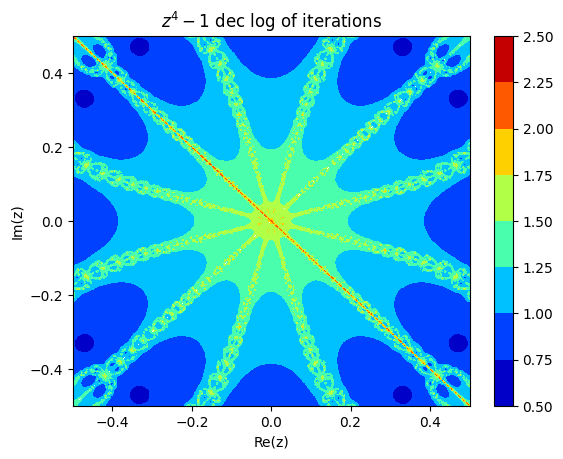

In [ ]:
plt.figure()
plt.contourf(X_f2_mesh, Y_f2_mesh, ans_iter_f2_log10, cmap='jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^4-1$ dec log of iterations')
plt.show()

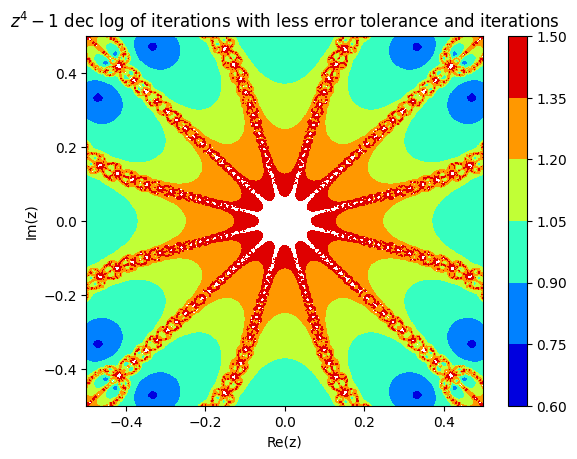

In [ ]:
plt.figure()
plt.contourf(X2_f2_mesh, Y2_f2_mesh, ans_iter2_f2_log10, cmap='jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'$z^4-1$ dec log of iterations with less error tolerance and iterations')
plt.show()

We can see there are much more black spots with None value.

Finally, we can see fractal from the function $f(x) = 35z^9 - 180z^7 +378z^5 -420z^3+315z$

In [ ]:
def f3(z):
  return 35*z**9 - 180*z**7 + 378*z**5 - 420*z**3 + 315*z

def df3(z):
  return 315*z**8 - 1260*z**6 + 1890*z**4 - 1260*z**2 + 315

In [ ]:
X_f3 = np.linspace(-20, 20, 400)
Y_f3 = np.linspace(-20, 20, 400)
X_f3_mesh, Y_f3_mesh = np.meshgrid(X_f3, Y_f3)

ans_x_f3, ans_y_f3, ans_z_f3, ans_iter_f3_log10 = fractal(X_f2, Y_f2, f2, df2, 200, 1e-9)

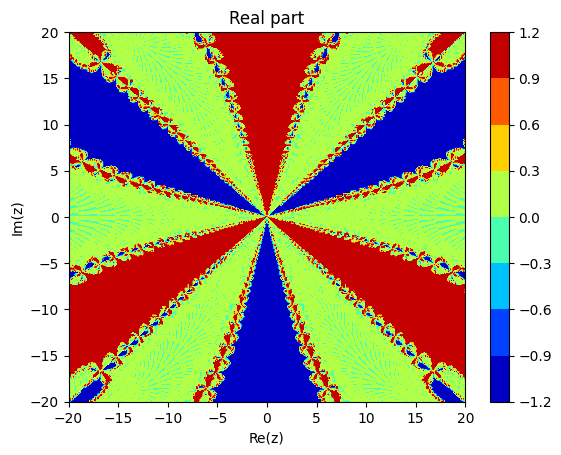

In [ ]:
plt.figure()
plt.contourf(X_f3_mesh, Y_f3_mesh, ans_z_f3.real, cmap = 'jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'Real part')
plt.show()

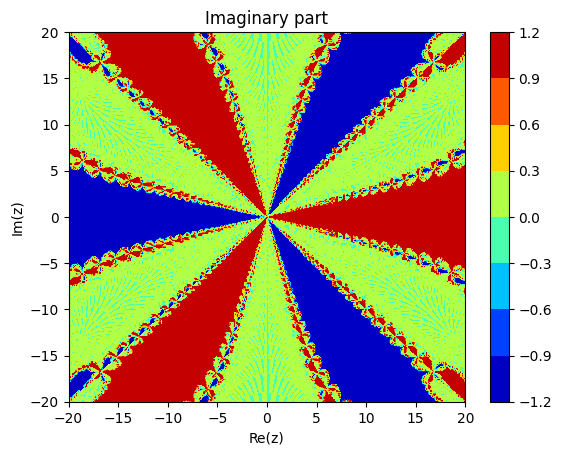

In [ ]:
plt.figure()
plt.contourf(X_f3_mesh, Y_f3_mesh, ans_z_f3.imag, cmap = 'jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title(f'Imaginary part')
plt.show()

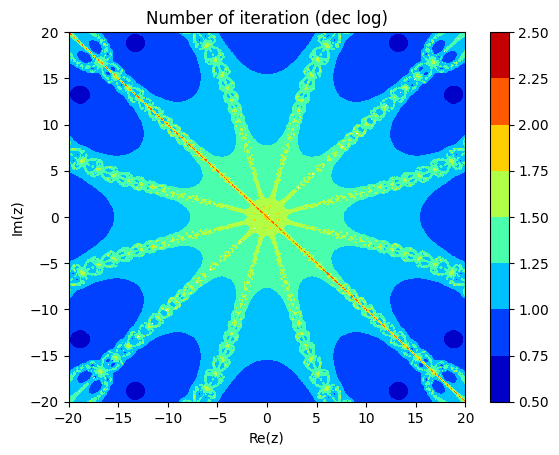

In [ ]:
plt.figure()
plt.contourf(X_f3_mesh, Y_f3_mesh, ans_iter_f3_log10, cmap = 'jet')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel('Im(z)')
plt.title("Number of iteration (dec log)")
plt.show()